In [2]:
## import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import cv2
import PIL
from PIL import Image
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import glob
import random
import os
from os import listdir
random.seed(100)
np.random.seed(100)


/Users/lalebaksi/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
## import libraries for modelling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, roc_curve, roc_auc_score, auc, log_loss

from mlxtend.plotting import plot_confusion_matrix

In [4]:
import tensorflow as tf

In [5]:
## import libraries

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import callbacks

In [6]:
from PIL import Image
import imageio.v3 as iio
import glob
from matplotlib.pyplot import imread
import cv2

# This file works on the CBIS-DDSM dataset;

1- Combine calc_case_test, calc_case_train, mass_case_train and mass_case_test datasets.

2 - Create visualizations on the combined data. 

3 - Once combined, apply models and evaluate.

In [7]:
## load the calc_train dataset

calc_train_data= pd.read_csv('/Users/lalebaksi/Desktop/DS_3rd_Phase/archive (2)/csv/calc_case_description_train_set.csv')

In [8]:
## load the calc_test dataset

calc_test_data= pd.read_csv('/Users/lalebaksi/Desktop/DS_3rd_Phase/archive (2)/csv/calc_case_description_test_set.csv')

In [9]:
## load the mass_train dataset

mass_train_data= pd.read_csv('/Users/lalebaksi/Desktop/DS_3rd_Phase/archive (2)/csv/mass_case_description_train_set.csv')

In [10]:
## load the mass_test dataset

mass_test_data= pd.read_csv('/Users/lalebaksi/Desktop/DS_3rd_Phase/archive (2)/csv/mass_case_description_test_set.csv')

In [11]:
## check if there are any missing values in calc_train_data
calc_train_data.isnull().sum()

patient_id                    0
breast density                0
left or right breast          0
image view                    0
abnormality id                0
abnormality type              0
calc type                    20
calc distribution           376
assessment                    0
pathology                     0
subtlety                      0
image file path               0
cropped image file path       0
ROI mask file path            0
Unnamed: 14                1546
dtype: int64

In [12]:
## check if there are any missing values in calc_test_data
calc_test_data.isnull().sum()

patient_id                  0
breast density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
calc type                   4
calc distribution          63
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [13]:
## fill the missing values in both datasets for calc
## fill missing values for calc type and calc distribution for calc_train and calc_test


calc_train_data['calc type'].fillna(method='bfill', axis=0, inplace=True)
calc_train_data['calc distribution'].fillna(method='bfill', axis=0, inplace=True)
calc_test_data['calc type'].fillna(method='bfill', axis=0, inplace=True)
calc_test_data['calc distribution'].fillna(method='bfill', axis=0, inplace=True)


In [14]:
calc_train_data.isnull().sum()

patient_id                    0
breast density                0
left or right breast          0
image view                    0
abnormality id                0
abnormality type              0
calc type                     0
calc distribution             0
assessment                    0
pathology                     0
subtlety                      0
image file path               0
cropped image file path       0
ROI mask file path            0
Unnamed: 14                1546
dtype: int64

In [15]:
calc_test_data.isnull().sum()

patient_id                 0
breast density             0
left or right breast       0
image view                 0
abnormality id             0
abnormality type           0
calc type                  0
calc distribution          0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [16]:
## check if there are any missing values in mass_train_data
mass_train_data.isnull().sum()

patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  4
mass margins               43
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [17]:
## check if there are any missing values in mass_test_data
mass_test_data.isnull().sum()

patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  0
mass margins               17
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [18]:
## fill the missing values in both datasets for mass
## fill missing values for mass shape and mass margins 

mass_test_data['mass margins'].fillna(method='bfill', axis=0, inplace=True)
mass_train_data['mass shape'].fillna(method='bfill', axis=0, inplace=True)
mass_train_data['mass margins'].fillna(method='bfill', axis=0, inplace=True)

In [19]:
mass_train_data.isnull().sum()

patient_id                 0
breast_density             0
left or right breast       0
image view                 0
abnormality id             0
abnormality type           0
mass shape                 0
mass margins               0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [20]:
mass_test_data.isnull().sum()

patient_id                 0
breast_density             0
left or right breast       0
image view                 0
abnormality id             0
abnormality type           0
mass shape                 0
mass margins               0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [21]:
## now drop the columns that we don't need
calc_train_data.drop(['Unnamed: 14', 'image file path', 'cropped image file path', 'ROI mask file path', 'image view'], axis=1, inplace=True)
calc_test_data.drop(['image file path', 'cropped image file path', 'ROI mask file path', 'image view'], axis=1, inplace=True)
mass_train_data.drop(['image file path', 'cropped image file path', 'ROI mask file path', 'image view'], axis=1, inplace=True)
mass_test_data.drop(['image file path', 'cropped image file path', 'ROI mask file path', 'image view'], axis=1, inplace=True)

In [22]:
calc_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   patient_id            1546 non-null   object
 1   breast density        1546 non-null   int64 
 2   left or right breast  1546 non-null   object
 3   abnormality id        1546 non-null   int64 
 4   abnormality type      1546 non-null   object
 5   calc type             1546 non-null   object
 6   calc distribution     1546 non-null   object
 7   assessment            1546 non-null   int64 
 8   pathology             1546 non-null   object
 9   subtlety              1546 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 120.9+ KB


In [23]:
calc_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   patient_id            326 non-null    object
 1   breast density        326 non-null    int64 
 2   left or right breast  326 non-null    object
 3   abnormality id        326 non-null    int64 
 4   abnormality type      326 non-null    object
 5   calc type             326 non-null    object
 6   calc distribution     326 non-null    object
 7   assessment            326 non-null    int64 
 8   pathology             326 non-null    object
 9   subtlety              326 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 25.6+ KB


In [24]:
## combine both calc_datasets
import pandas as pd
calc_full_data= pd.concat((calc_train_data, calc_test_data), axis=0, ignore_index=True)

In [25]:
## combine both mass_datasets
import pandas as pd
mass_full_data= pd.concat((mass_train_data, mass_test_data), axis=0, ignore_index=True)

In [26]:
calc_full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   patient_id            1872 non-null   object
 1   breast density        1872 non-null   int64 
 2   left or right breast  1872 non-null   object
 3   abnormality id        1872 non-null   int64 
 4   abnormality type      1872 non-null   object
 5   calc type             1872 non-null   object
 6   calc distribution     1872 non-null   object
 7   assessment            1872 non-null   int64 
 8   pathology             1872 non-null   object
 9   subtlety              1872 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 146.4+ KB


In [27]:
## choose the same number of rows as mass data

calc_full_data_new= calc_full_data.iloc[:1696]

In [28]:
calc_full_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696 entries, 0 to 1695
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   patient_id            1696 non-null   object
 1   breast density        1696 non-null   int64 
 2   left or right breast  1696 non-null   object
 3   abnormality id        1696 non-null   int64 
 4   abnormality type      1696 non-null   object
 5   calc type             1696 non-null   object
 6   calc distribution     1696 non-null   object
 7   assessment            1696 non-null   int64 
 8   pathology             1696 non-null   object
 9   subtlety              1696 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 132.6+ KB


In [29]:
mass_full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696 entries, 0 to 1695
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   patient_id            1696 non-null   object
 1   breast_density        1696 non-null   int64 
 2   left or right breast  1696 non-null   object
 3   abnormality id        1696 non-null   int64 
 4   abnormality type      1696 non-null   object
 5   mass shape            1696 non-null   object
 6   mass margins          1696 non-null   object
 7   assessment            1696 non-null   int64 
 8   pathology             1696 non-null   object
 9   subtlety              1696 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 132.6+ KB


In [30]:
## add new two columns to both datasets to be able to combine them

calc_full_data_new.insert(7, 'mass shape', mass_full_data['mass shape'])
calc_full_data_new.insert(8, 'mass margins', mass_full_data['mass margins'])


In [31]:
calc_full_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696 entries, 0 to 1695
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   patient_id            1696 non-null   object
 1   breast density        1696 non-null   int64 
 2   left or right breast  1696 non-null   object
 3   abnormality id        1696 non-null   int64 
 4   abnormality type      1696 non-null   object
 5   calc type             1696 non-null   object
 6   calc distribution     1696 non-null   object
 7   mass shape            1696 non-null   object
 8   mass margins          1696 non-null   object
 9   assessment            1696 non-null   int64 
 10  pathology             1696 non-null   object
 11  subtlety              1696 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 159.1+ KB


In [32]:
mass_full_data.insert(5, 'calc type', calc_full_data_new['calc type'])
mass_full_data.insert(6, 'calc distribution', calc_full_data_new['calc distribution'])


In [33]:
mass_full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696 entries, 0 to 1695
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   patient_id            1696 non-null   object
 1   breast_density        1696 non-null   int64 
 2   left or right breast  1696 non-null   object
 3   abnormality id        1696 non-null   int64 
 4   abnormality type      1696 non-null   object
 5   calc type             1696 non-null   object
 6   calc distribution     1696 non-null   object
 7   mass shape            1696 non-null   object
 8   mass margins          1696 non-null   object
 9   assessment            1696 non-null   int64 
 10  pathology             1696 non-null   object
 11  subtlety              1696 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 159.1+ KB


In [34]:
## rename the column to match the same column name in calc dataset
mass_full_data= mass_full_data.rename(columns={'breast_density': 'breast density'})

In [35]:
## now we can combine and then process the data 
import pandas as pd
breast_cancer_data= pd.concat((calc_full_data_new, mass_full_data), axis=0, ignore_index=True)

In [36]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3392 entries, 0 to 3391
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   patient_id            3392 non-null   object
 1   breast density        3392 non-null   int64 
 2   left or right breast  3392 non-null   object
 3   abnormality id        3392 non-null   int64 
 4   abnormality type      3392 non-null   object
 5   calc type             3392 non-null   object
 6   calc distribution     3392 non-null   object
 7   mass shape            3392 non-null   object
 8   mass margins          3392 non-null   object
 9   assessment            3392 non-null   int64 
 10  pathology             3392 non-null   object
 11  subtlety              3392 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 318.1+ KB


In [37]:
breast_cancer_data.head()

,patient_id,breast density,left or right breast,abnormality id,abnormality type,calc type,calc distribution,mass shape,mass margins,assessment,pathology,subtlety
0,P_00005,3,RIGHT,1,calcification,AMORPHOUS,CLUSTERED,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,3,MALIGNANT,3
1,P_00005,3,RIGHT,1,calcification,AMORPHOUS,CLUSTERED,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,3,MALIGNANT,3
2,P_00007,4,LEFT,1,calcification,PLEOMORPHIC,LINEAR,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,4
3,P_00007,4,LEFT,1,calcification,PLEOMORPHIC,LINEAR,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,4
4,P_00008,1,LEFT,1,calcification,ROUND_AND_REGULAR-LUCENT_CENTER-DYSTROPHIC,REGIONAL,OVAL,CIRCUMSCRIBED,2,BENIGN_WITHOUT_CALLBACK,3


In [38]:
## now change the text to numberical values for modelling

In [39]:
## change the Patient ID to a value
## get unique patient ids from the dataset

patient_ids= breast_cancer_data['patient_id'].unique()
value_mapping = {}
value= 0

for patient_id in patient_ids:
    value_mapping[patient_id]= value
    value += 1

breast_cancer_data['new_patient_id']= breast_cancer_data['patient_id'].map(value_mapping)

In [40]:
## convert 'pathology' and 'left or right breast'
breast_cancer_data['new_pathology']= np.where(breast_cancer_data['pathology'] == 'MALIGNANT', 1, 0)
breast_cancer_data['lr_breast']= np.where(breast_cancer_data['left or right breast'] == 'RIGHT', 1, 0)
breast_cancer_data['abnormality_type']= np.where(breast_cancer_data['abnormality type'] == 'mass', 1, 0)


In [41]:
## change mass margins to values
margins_conditions = [
    breast_cancer_data['mass margins'] == 'CIRCUMSCRIBED',
    breast_cancer_data['mass margins'] == 'SPICULATED',
    breast_cancer_data['mass margins'] == 'ILL_DEFINED',
    breast_cancer_data['mass margins'] == 'OBSCURED',
    breast_cancer_data['mass margins'] == 'MICROBULATED'
]

margins_choices= [0, 1, 2, 3, 4]
breast_cancer_data['new_mass_margins']= np.select(margins_conditions, margins_choices, default=5)

In [42]:
## change mass shape to values
shape_conditions = [
    breast_cancer_data['mass shape'] == 'IRREGULAR',
    breast_cancer_data['mass shape'] == 'OVAL',
    breast_cancer_data['mass shape'] == 'LOBULATED',
    breast_cancer_data['mass shape'] == 'ROUND',
]

shape_choices= [0, 1, 2, 3]
breast_cancer_data['new_mass_shape']= np.select(shape_conditions, shape_choices, default=4)

In [43]:
## change calc type to values
## choose the top where there are cases more than 100 count
calctype_conditions = [
    breast_cancer_data['calc type'] == 'PLEOMORPHIC',
    breast_cancer_data['calc type'] == 'AMORPHOUS',
    breast_cancer_data['calc type'] == 'PUNCTATE',
]

calctype_choices= [0, 1, 2]
breast_cancer_data['new_calc_type']= np.select(calctype_conditions, calctype_choices, default=3)

In [44]:
## change calc distribution to values
## choose the top where there are cases more than 100 count
calcdistr_conditions = [
    breast_cancer_data['calc distribution'] == 'CLUSTERED',
    breast_cancer_data['calc distribution'] == 'SEGMENTAL',
    breast_cancer_data['calc distribution'] == 'REGIONAL',
    breast_cancer_data['calc distribution'] == 'LINEAR',
]

calcdistr_choices= [0, 1, 2, 3]
breast_cancer_data['new_calc_distribution']= np.select(calcdistr_conditions, calcdistr_choices, default=4)

In [45]:
breast_cancer_data.head()

,patient_id,breast density,left or right breast,abnormality id,abnormality type,calc type,calc distribution,mass shape,mass margins,assessment,pathology,subtlety,new_patient_id,new_pathology,lr_breast,abnormality_type,new_mass_margins,new_mass_shape,new_calc_type,new_calc_distribution
0,P_00005,3,RIGHT,1,calcification,AMORPHOUS,CLUSTERED,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,3,MALIGNANT,3,0,1,1,0,1,4,1,0
1,P_00005,3,RIGHT,1,calcification,AMORPHOUS,CLUSTERED,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,3,MALIGNANT,3,0,1,1,0,1,4,1,0
2,P_00007,4,LEFT,1,calcification,PLEOMORPHIC,LINEAR,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,4,1,0,0,0,2,4,0,3
3,P_00007,4,LEFT,1,calcification,PLEOMORPHIC,LINEAR,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,4,1,0,0,0,2,4,0,3
4,P_00008,1,LEFT,1,calcification,ROUND_AND_REGULAR-LUCENT_CENTER-DYSTROPHIC,REGIONAL,OVAL,CIRCUMSCRIBED,2,BENIGN_WITHOUT_CALLBACK,3,2,0,0,0,0,1,3,2


In [46]:
BC_data= breast_cancer_data.drop(['pathology', 'patient_id', 'left or right breast', 'abnormality type', 'calc type', 'calc distribution', 'mass margins', 'mass shape'], axis=1)

In [47]:
## now re-order the columns and drop the unnecessary text columns as they are already coded as values
## and re-index them acc to new column order
new_column_order= ['new_patient_id', 'lr_breast','breast density', 'abnormality id', 'abnormality_type', 'new_calc_type', 'new_calc_distribution','new_mass_shape', 'new_mass_margins', 'assessment', 'subtlety', 'new_pathology']

BC_data= BC_data.reindex(columns=new_column_order)

In [48]:
BC_data.head()

,new_patient_id,lr_breast,breast density,abnormality id,abnormality_type,new_calc_type,new_calc_distribution,new_mass_shape,new_mass_margins,assessment,subtlety,new_pathology
0,0,1,3,1,0,1,0,4,1,3,3,1
1,0,1,3,1,0,1,0,4,1,3,3,1
2,1,0,4,1,0,0,3,4,2,4,4,0
3,1,0,4,1,0,0,3,4,2,4,4,0
4,2,0,1,1,0,3,2,1,0,2,3,0


In [49]:
BC_data.describe()

,new_patient_id,lr_breast,breast density,abnormality id,abnormality_type,new_calc_type,new_calc_distribution,new_mass_shape,new_mass_margins,assessment,subtlety,new_pathology
count,3392.000000,3392.000000,3392.000000,3392.000000,3392.000000,3392.000000,3392.000000,3392.000000,3392.000000,3392.000000,3392.000000,3392.000000
mean,670.424233,0.492630,2.455189,1.257370,0.500000,1.449882,0.755307,1.623821,1.942807,3.394458,3.663915,0.407134
std,431.006155,0.500019,0.929732,0.718036,0.500074,1.384444,1.235820,1.389602,1.667327,1.315943,1.182401,0.491373
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,300.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000,0.000000
50%,608.000000,0.000000,2.000000,1.000000,0.500000,1.000000,0.000000,1.000000,2.000000,4.000000,4.000000,0.000000
75%,1036.250000,1.000000,3.000000,1.000000,1.000000,3.000000,1.000000,3.000000,3.000000,4.000000,5.000000,1.000000
max,1491.000000,1.000000,4.000000,7.000000,1.000000,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000,1.000000


In [50]:
BC_data_matrix= BC_data.corr()
BC_data_matrix

,new_patient_id,lr_breast,breast density,abnormality id,abnormality_type,new_calc_type,new_calc_distribution,new_mass_shape,new_mass_margins,assessment,subtlety,new_pathology
new_patient_id,1.000000,0.042021,-0.164949,-0.219535,7.910964e-01,1.375126e-02,-3.787443e-03,-6.776383e-02,3.421905e-02,0.062713,0.160260,0.112177
lr_breast,0.042021,1.000000,-0.030208,0.012267,5.130274e-02,1.544126e-02,2.807401e-03,3.463071e-02,-5.457905e-03,0.004868,0.032221,-0.033993
breast density,-0.164949,-0.030208,1.000000,-0.071730,-2.245347e-01,-9.545018e-02,-1.159936e-02,3.693671e-02,4.590529e-02,0.086762,-0.303689,0.006703
abnormality id,-0.219535,0.012267,-0.071730,1.000000,-2.040885e-01,2.056565e-01,8.295563e-02,3.056154e-02,-2.588123e-02,-0.193301,0.120668,-0.150806
abnormality_type,0.791096,0.051303,-0.224535,-0.204088,1.000000e+00,-3.023188e-16,-1.057824e-15,-6.406870e-16,-8.773707e-16,0.088729,0.221440,0.112212
new_calc_type,0.013751,0.015441,-0.095450,0.205657,-3.023188e-16,1.000000e+00,2.005264e-01,-1.961320e-02,1.217208e-02,-0.253961,0.142474,-0.184361
new_calc_distribution,-0.003787,0.002807,-0.011599,0.082956,-1.057824e-15,2.005264e-01,1.000000e+00,2.606251e-02,-2.053332e-02,-0.010445,0.069434,0.007732
new_mass_shape,-0.067764,0.034631,0.036937,0.030562,-6.406870e-16,-1.961320e-02,2.606251e-02,1.000000e+00,-2.303504e-02,-0.073162,-0.018279,-0.108186
new_mass_margins,0.034219,-0.005458,0.045905,-0.025881,-8.773707e-16,1.217208e-02,-2.053332e-02,-2.303504e-02,1.000000e+00,-0.044552,-0.038324,0.063345
assessment,0.062713,0.004868,0.086762,-0.193301,8.872914e-02,-2.539608e-01,-1.044490e-02,-7.316223e-02,-4.455183e-02,1.000000,-0.007452,0.483542


Text(0.5, 1.0, 'Heatmap Correlation Matrix')

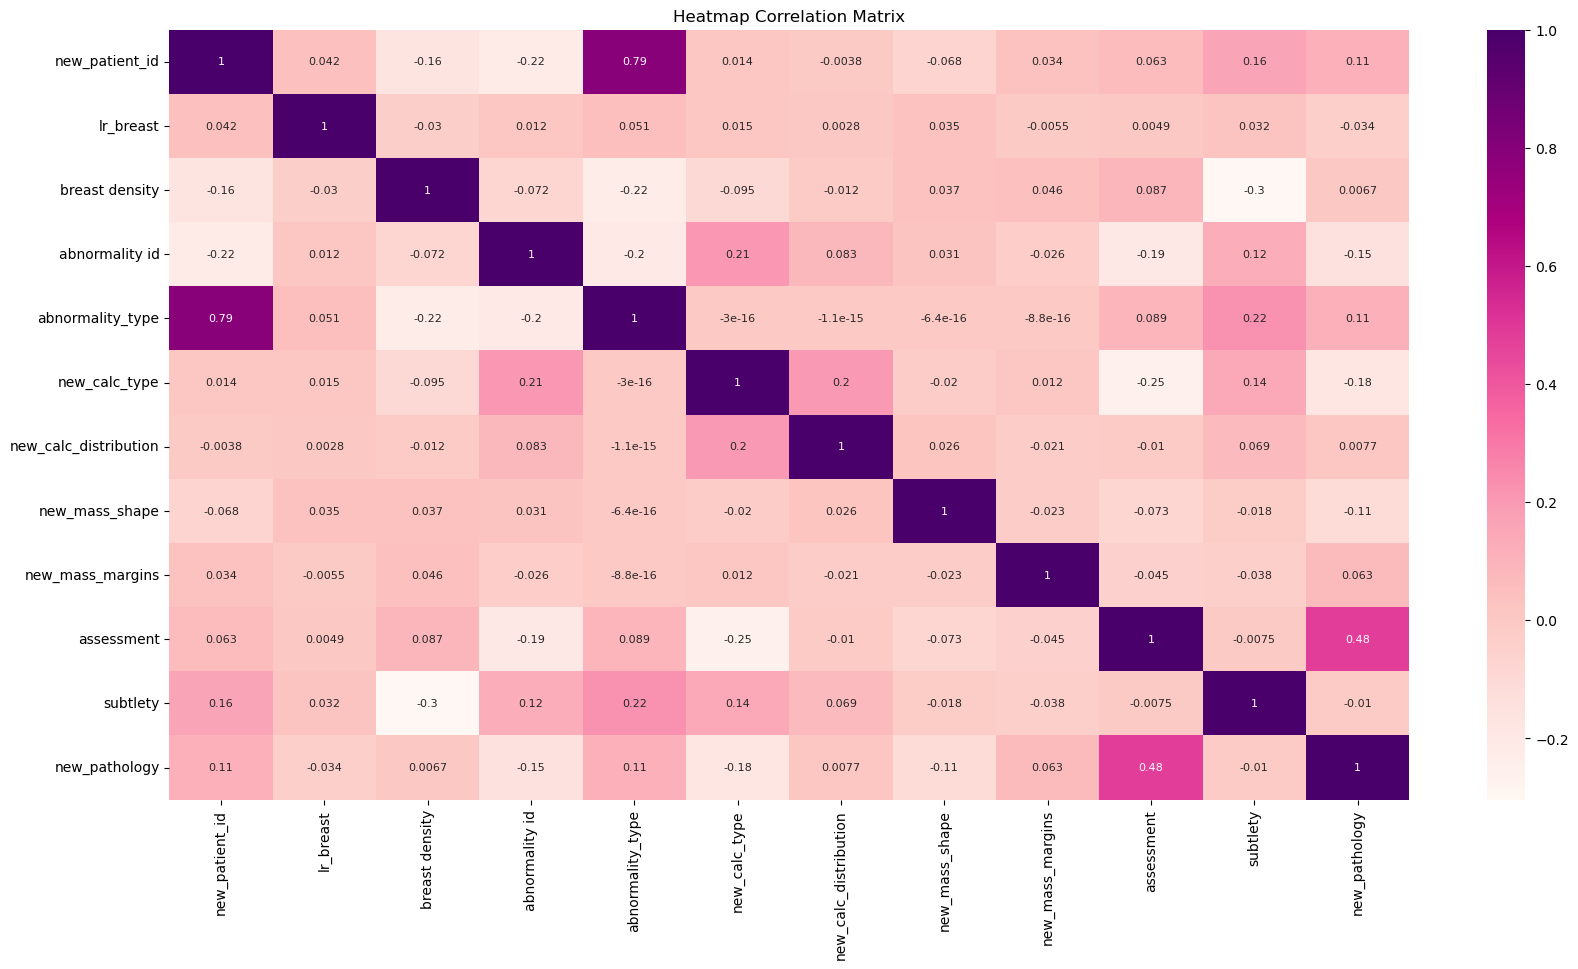

In [51]:
## plot the correlation matrix on a heatmap to see clearly the relations 
plt.figure(figsize=(20, 10))
sns.heatmap(BC_data_matrix, annot=True, annot_kws={'size': 8}, cmap='RdPu')
plt.title('Heatmap Correlation Matrix', loc='center')

<function matplotlib.pyplot.show(close=None, block=None)>

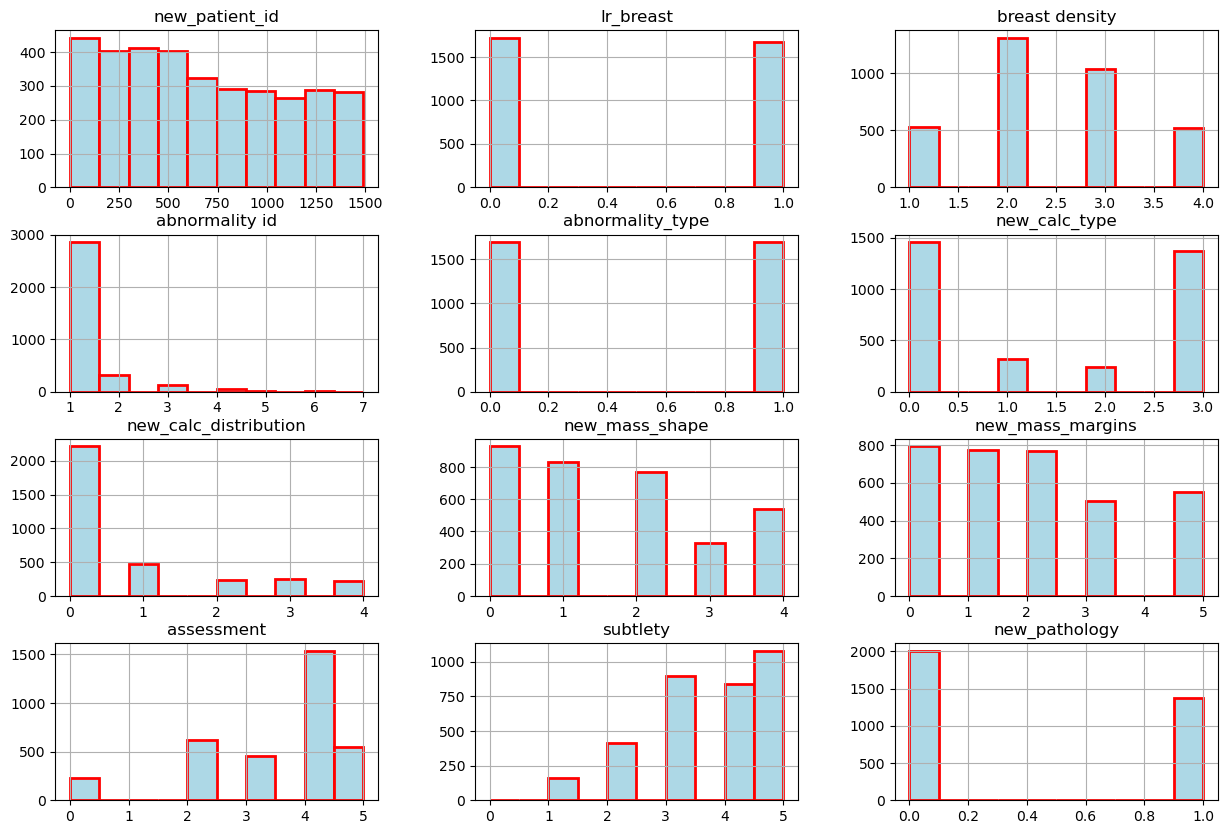

In [52]:
## before going into each parameter, let me check each variables histogram plot 
BC_data.hist(bins=10, figsize=(15,10), color='lightblue', ec='red', lw= 2)
plt.show

In [53]:
## check the breast density information
## how many types are there?
bdensity= pd.DataFrame(BC_data['breast density'].value_counts())
bdensity= bdensity.reset_index()
bdensity= bdensity.rename(columns={'breast density': 'No_Breast Density Types', 'index': 'Breast Density Type'})
bdensity

,Breast Density Type,No_Breast Density Types
0,2,1309
1,3,1038
2,1,528
3,4,517


In [54]:
## plot the breast density types
bdensity_graph= px.bar(data_frame=bdensity, y='No_Breast Density Types', x='Breast Density Type', color='Breast Density Type')
bdensity_graph.update_layout(title='Breast Density Types', title_x=0.5, yaxis=dict(type='log'))
bdensity_graph

/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_64469/3270033025.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_64469/3270033025.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<function matplotlib.pyplot.show(close=None, block=None)>

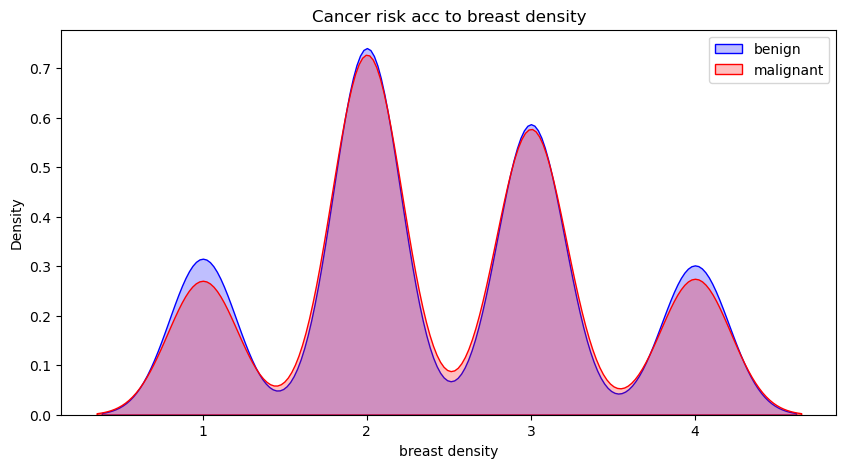

In [55]:
plt.figure(figsize=(10,5))

ax = sns.kdeplot(BC_data['breast density'][BC_data.new_pathology == 0], color= 'blue', shade=True)
sns.kdeplot(BC_data['breast density'][BC_data.new_pathology == 1], color='red', shade=True)

plt.legend(['benign', 'malignant'])
plt.title('Cancer risk acc to breast density')
ax.set(xlabel='breast density')
plt.xlim()
plt.show

In [56]:
import pandas as pd
import plotly.express as px

benign_data = BC_data[BC_data['new_pathology'] == 0]
malignant_data = BC_data[BC_data['new_pathology'] == 1]

bdensity_graph = px.histogram(BC_data, x='breast density', color='new_pathology', barmode='overlay',title='Cancer Risk According to Breast Density',labels={'breast density': 'Breast Density', 'new_pathology': 'Pathology'})

bdensity_graph.update_layout(showlegend=True)
bdensity_graph.show()

<Axes: xlabel='assessment', ylabel='count'>

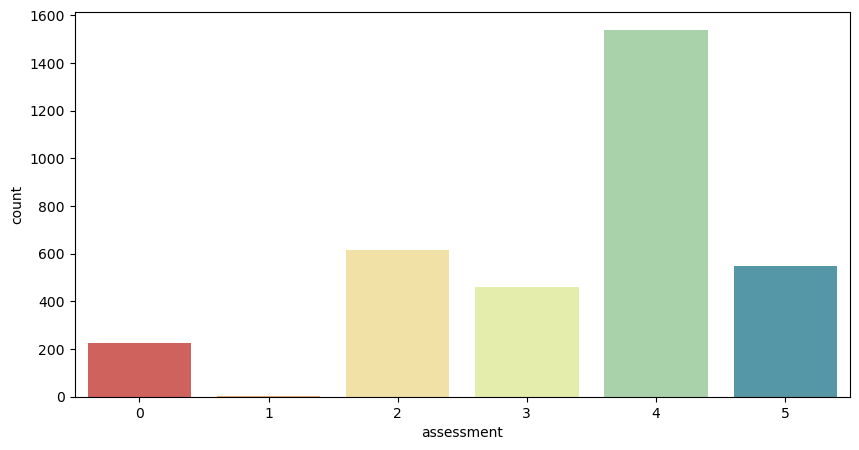

In [57]:
## assessment grades
plt.figure(figsize=(10,5))
sns.countplot(x='assessment',data=BC_data, palette='Spectral')

In [58]:
## check the assessment again 
## how many types are there?
assess= pd.DataFrame(BC_data['assessment'].value_counts())
assess= assess.reset_index()
assess= assess.rename(columns={'assessment': 'No of Assessment Grades', 'index': 'Assessment Grades'})
assess

,Assessment Grades,No of Assessment Grades
0,4,1538
1,2,616
2,5,550
3,3,459
4,0,226
5,1,3


In [59]:
## plot the assessment again

assess_graph= px.bar(data_frame=assess, y='No of Assessment Grades', x='Assessment Grades', color='Assessment Grades')
assess_graph.update_layout(title='Assessment Grades', title_x=0.5, yaxis=dict(type='log'))
assess_graph

/Users/lalebaksi/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/Users/lalebaksi/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/Users/lalebaksi/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/Users/lalebaksi/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




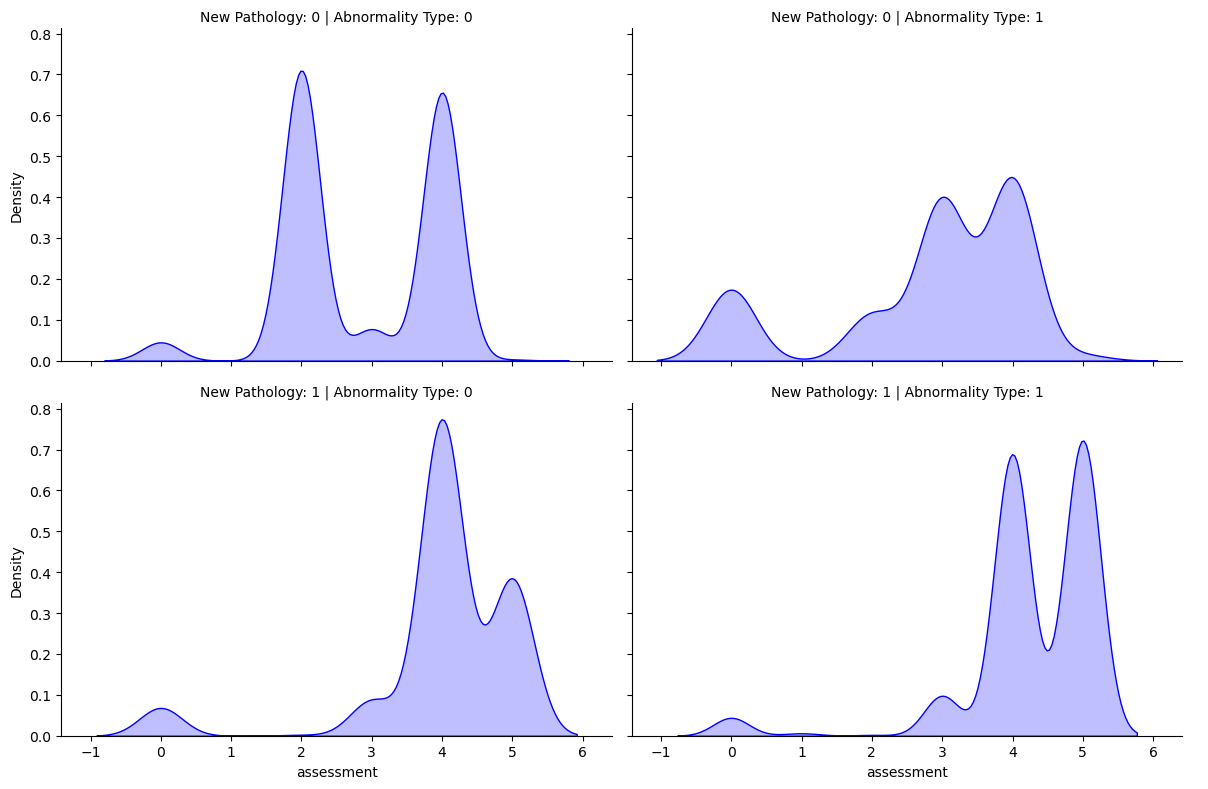

In [60]:
## create a FacetGrid with 'new_pathology' as the row and 'abnormality_type' as the column
ass_abn_path = sns.FacetGrid(BC_data, row='new_pathology', col='abnormality_type', height=4, aspect=1.5)

## plot the KDE for 'assessment' in each subplot
ass_abn_path.map(sns.kdeplot, 'assessment', color='blue', shade=True)
ass_abn_path.add_legend()

## set title for each subplot
ass_abn_path.set_titles(row_template='New Pathology: {row_name}', col_template='Abnormality Type: {col_name}')
plt.show()

<Figure size 1000x500 with 0 Axes>

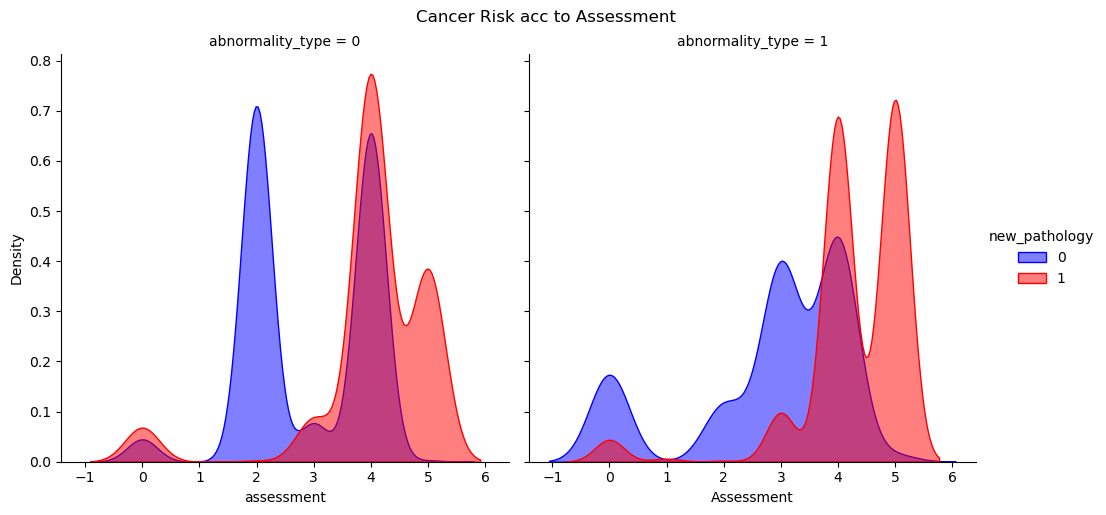

In [61]:
## combine the grids now

plt.figure(figsize=(10, 5))

## create a FacetGrid first
ass_abn_path1 = sns.FacetGrid(data=BC_data, col='abnormality_type', hue='new_pathology', hue_order=[0, 1], col_order=[0, 1], palette=['blue', 'red'], height=5, aspect=1)

## then plot the KDE for 'assessment' on each facet
ass_abn_path1.map_dataframe(sns.kdeplot, x='assessment', fill=True, alpha=0.5, common_norm=False)

ass_abn_path1.add_legend()
ass_abn_path1.fig.suptitle('Cancer Risk acc to Assessment', y=1.02)
plt.xlabel('Assessment')
plt.ylabel('Density')
plt.show()

/Users/lalebaksi/anaconda3/lib/python3.10/site-packages/seaborn/distributions.py:1185: UserWarning:

The following kwargs were not used by contour: 'colormap'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

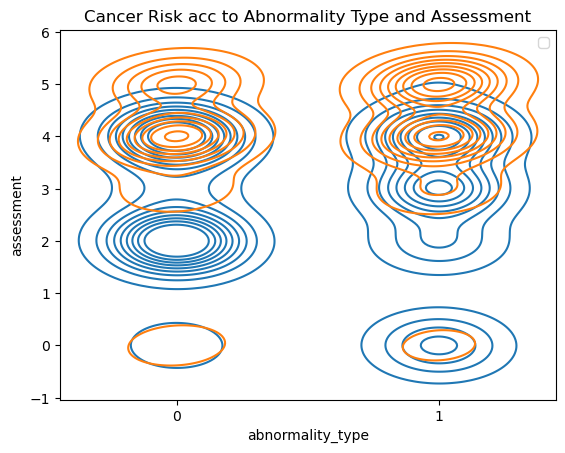

In [62]:
## plot again with a different style
sns.kdeplot(x=BC_data['abnormality_type'], y=BC_data['assessment'], hue=BC_data['new_pathology'], colormap= 'magma')
plt.legend(loc= 'best')
plt.xticks([0, 1])
plt.title('Cancer Risk acc to Abnormality Type and Assessment')
plt.show

<Figure size 1000x500 with 0 Axes>

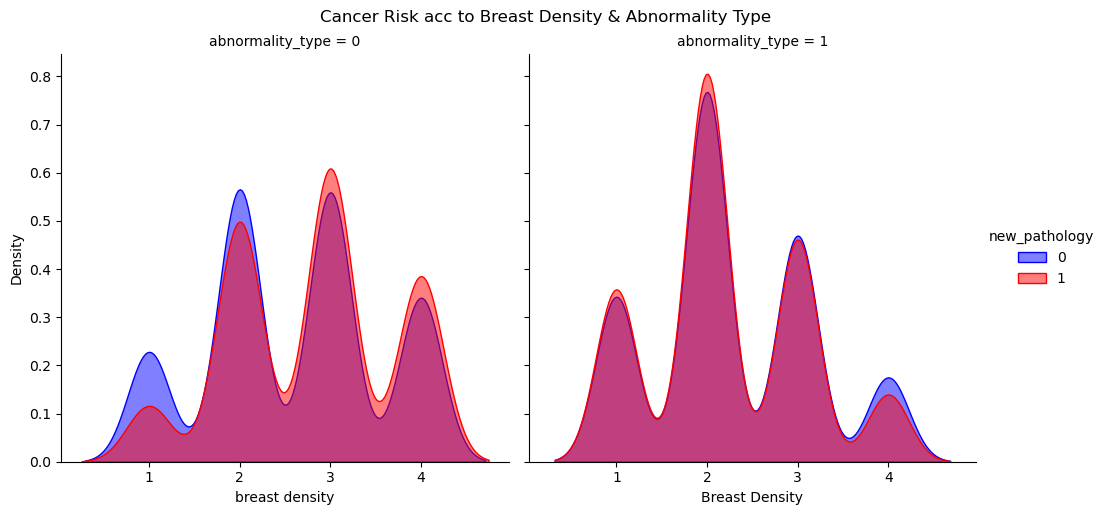

In [63]:
## plot for breast density vs abnormality type vs pathology

plt.figure(figsize=(10, 5))

## create a FacetGrid first
bdens_abn_path = sns.FacetGrid(data=BC_data, col='abnormality_type', hue='new_pathology', hue_order=[0, 1], col_order=[0, 1], palette=['blue', 'red'], height=5, aspect=1)

## then plot the KDE for 'breast density' on each facet
bdens_abn_path.map_dataframe(sns.kdeplot, x='breast density', fill=True, alpha=0.5, common_norm=False)

bdens_abn_path.add_legend()
bdens_abn_path.fig.suptitle('Cancer Risk acc to Breast Density & Abnormality Type', y=1.02)
plt.xlabel('Breast Density')
plt.ylabel('Density')
plt.show()

In [64]:
## check the subtlety information
## how many types are there?
subt= pd.DataFrame(BC_data['subtlety'].value_counts())
subt= subt.reset_index()
subt= subt.rename(columns={'subtlety': 'No of Subtlety types', 'index': 'Subtlety'})
subt

,Subtlety,No of Subtlety types
0,5,1080
1,3,898
2,4,836
3,2,414
4,1,162
5,0,2


<Figure size 1000x500 with 0 Axes>

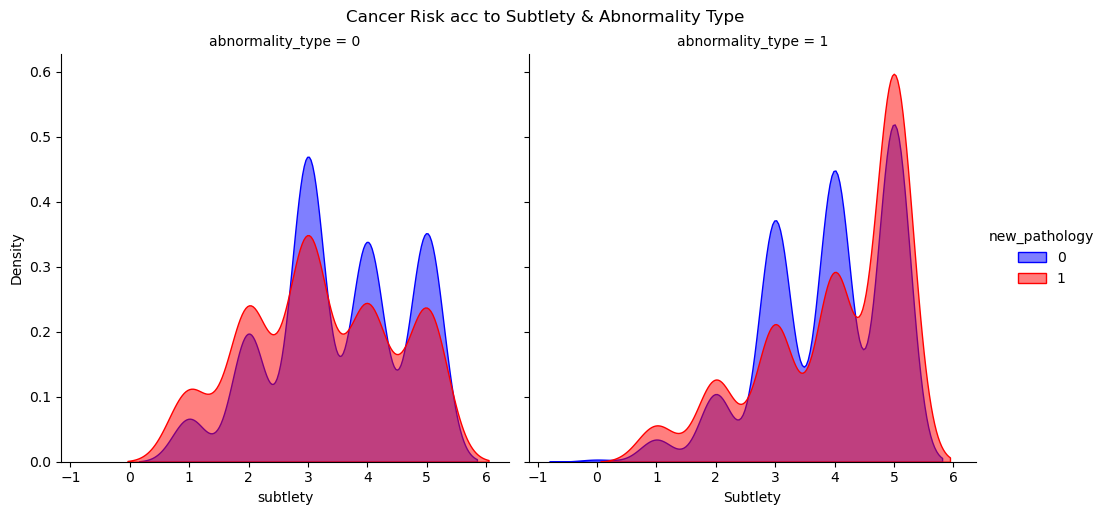

In [65]:
## plot for subtlety vs abnormality type vs pathology

plt.figure(figsize=(10, 5))

## create a FacetGrid first
subt_abn_path = sns.FacetGrid(data=BC_data, col='abnormality_type', hue='new_pathology', hue_order=[0, 1], col_order=[0, 1], palette=['blue', 'red'], height=5, aspect=1)

## then plot the KDE for 'subtlety' on each facet
subt_abn_path.map_dataframe(sns.kdeplot, x='subtlety', fill=True, alpha=0.5, common_norm=False)

subt_abn_path.add_legend()
subt_abn_path.fig.suptitle('Cancer Risk acc to Subtlety & Abnormality Type', y=1.02)
plt.xlabel('Subtlety')
plt.ylabel('Density')
plt.show()

In [70]:
## plot for subtlety vs pathology

import pandas as pd
import plotly.express as px

benign_data = BC_data[BC_data['new_pathology'] == 0]
malignant_data = BC_data[BC_data['new_pathology'] == 1]

subt_graph = px.histogram(BC_data, x='subtlety', color='new_pathology', barmode='overlay',title='Cancer Detection According to Subtlety',labels={'subtlety': 'Subtlety Grades', 'new_pathology': 'Pathology'})

subt_graph.update_layout(showlegend=True)
subt_graph.show()

/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_64469/2396501618.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_64469/2396501618.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<function matplotlib.pyplot.show(close=None, block=None)>

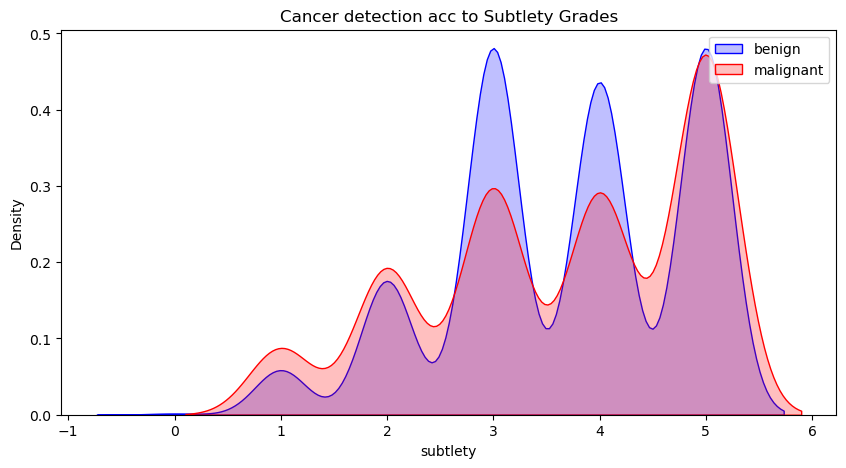

In [69]:
plt.figure(figsize=(10,5))

ax = sns.kdeplot(BC_data['subtlety'][BC_data.new_pathology == 0], color= 'blue', shade=True)
sns.kdeplot(BC_data['subtlety'][BC_data.new_pathology == 1], color='red', shade=True)

plt.legend(['benign', 'malignant'])
plt.title('Cancer detection acc to Subtlety Grades')
ax.set(xlabel='subtlety')
plt.xlim()
plt.show

<Figure size 1000x500 with 0 Axes>

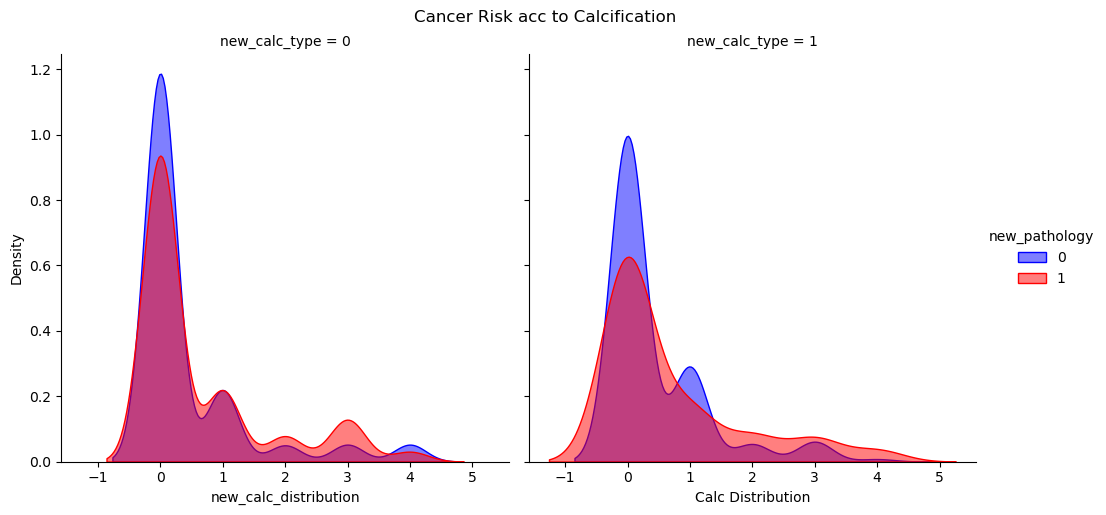

In [67]:
## plot for calc_type vs calc_dist vs pathology

plt.figure(figsize=(10, 5))

## create a FacetGrid first
cty_cdist_path = sns.FacetGrid(data=BC_data, col='new_calc_type', hue='new_pathology', hue_order=[0, 1], col_order=[0, 1], palette=['blue', 'red'], height=5, aspect=1)

cty_cdist_path.map_dataframe(sns.kdeplot, x='new_calc_distribution', fill=True, alpha=0.5, common_norm=False)

cty_cdist_path.add_legend()
cty_cdist_path.fig.suptitle('Cancer Risk acc to Calcification', y=1.02)
plt.xlabel('Calc Distribution')
plt.ylabel('Density')
plt.show()

In [ ]:
## define variables
X= BC_data.drop(['new_pathology',], axis=1)
Y= BC_data['new_pathology']

In [ ]:
X.head()

,new_patient_id,lr_breast,breast density,abnormality id,abnormality_type,new_calc_type,new_calc_distribution,new_mass_shape,new_mass_margins,assessment,subtlety
0,0,1,3,1,0,1,0,4,1,3,3
1,0,1,3,1,0,1,0,4,1,3,3
2,1,0,4,1,0,0,3,4,2,4,4
3,1,0,4,1,0,0,3,4,2,4,4
4,2,0,1,1,0,3,2,1,0,2,3


In [ ]:
Y.head()

0    1
1    1
2    0
3    0
4    0
Name: new_pathology, dtype: int64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3392 entries, 0 to 3391
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   new_patient_id         3392 non-null   int64
 1   lr_breast              3392 non-null   int64
 2   breast density         3392 non-null   int64
 3   abnormality id         3392 non-null   int64
 4   abnormality_type       3392 non-null   int64
 5   new_calc_type          3392 non-null   int64
 6   new_calc_distribution  3392 non-null   int64
 7   new_mass_shape         3392 non-null   int64
 8   new_mass_margins       3392 non-null   int64
 9   assessment             3392 non-null   int64
 10  subtlety               3392 non-null   int64
dtypes: int64(11)
memory usage: 291.6 KB


In [ ]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3392 entries, 0 to 3391
Series name: new_pathology
Non-Null Count  Dtype
--------------  -----
3392 non-null   int64
dtypes: int64(1)
memory usage: 26.6 KB


In [ ]:
## split my variables for train and test variables

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=32)

print('X_train size is:', X_train.shape)
print('X_test size is:', X_test.shape)
print('Y_train size is:', Y_train.shape)
print('Y_test size is:', Y_test.shape)


X_train size is: (2374, 11)
X_test size is: (1018, 11)
Y_train size is: (2374,)
Y_test size is: (1018,)


In [ ]:
## standardize the variables

scaler_x = StandardScaler()
X_train= scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [ ]:
## apply early stopping
## this will prevent to overrun the data for unnecessary epochs

early_stopping= callbacks.EarlyStopping(
    min_delta=0.01,
    patience=10,
    restore_best_weights=True)

In [ ]:
## set up a simple ANN model

breast_cancer_model= Sequential()
breast_cancer_model.add(Dense(units=128, kernel_initializer= 'uniform', activation= 'relu', input_dim= 11))
breast_cancer_model.add(Dense(units=64, kernel_initializer= 'uniform', activation= 'relu', input_dim= 11))
breast_cancer_model.add(Dense(units=32, kernel_initializer= 'uniform', activation= 'relu', input_dim= 11))
breast_cancer_model.add(Dense(units=16, kernel_initializer= 'uniform', activation= 'relu', input_dim= 11))
breast_cancer_model.add(Dropout(0.20))
breast_cancer_model.add(Dense(units=1,kernel_initializer= 'uniform', activation= 'sigmoid'))
breast_cancer_model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
breast_cancer_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,417
Trainable params: 12,417
Non-traina

In [ ]:
breast_cancer_history= breast_cancer_model.fit(X_train, Y_train, batch_size=32, epochs=100, callbacks=early_stopping, validation_split=0.25)

Epoch 1/100


2023-07-19 14:38:40.871887: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


56/56 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.5955 - val_loss: 0.5824 - val_accuracy: 0.6010
Epoch 2/100
56/56 [==============================] - 0s 851us/step - loss: 0.5468 - accuracy: 0.7090 - val_loss: 0.5188 - val_accuracy: 0.7391
Epoch 3/100
56/56 [==============================] - 0s 834us/step - loss: 0.4590 - accuracy: 0.7758 - val_loss: 0.4634 - val_accuracy: 0.7508
Epoch 4/100
56/56 [==============================] - 0s 883us/step - loss: 0.4107 - accuracy: 0.8022 - val_loss: 0.4553 - val_accuracy: 0.7643
Epoch 5/100
56/56 [==============================] - 0s 892us/step - loss: 0.4089 - accuracy: 0.7994 - val_loss: 0.4593 - val_accuracy: 0.7559
Epoch 6/100
56/56 [==============================] - 0s 901us/step - loss: 0.3869 - accuracy: 0.8163 - val_loss: 0.4488 - val_accuracy: 0.7677
Epoch 7/100
56/56 [==============================] - 0s 821us/step - loss: 0.3902 - accuracy: 0.8163 - val_loss: 0.4504 - val_accuracy: 0.7677
Epoch 8/100
5

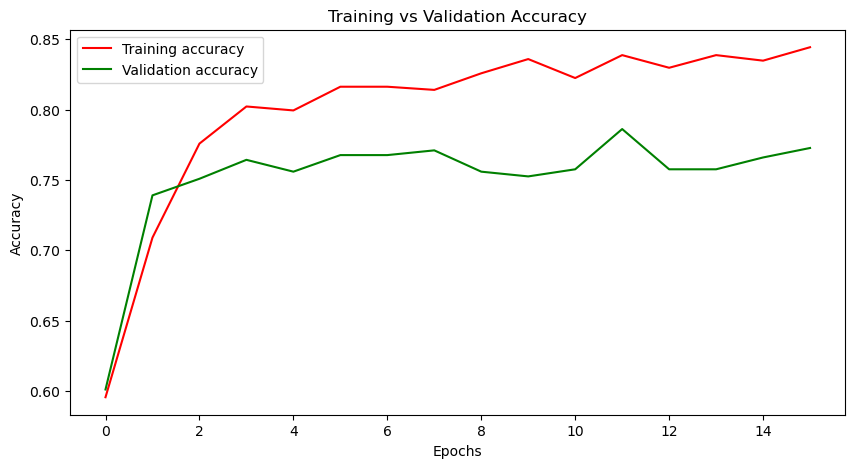

In [ ]:
breast_cancer_history_df= pd.DataFrame(breast_cancer_history.history)

plt.figure(figsize=(10,5))
plt.plot(breast_cancer_history_df.loc[:, ['accuracy']], color= 'red', label= 'Training accuracy')
plt.plot(breast_cancer_history_df.loc[:, ['val_accuracy']], color= 'green', label= 'Validation accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

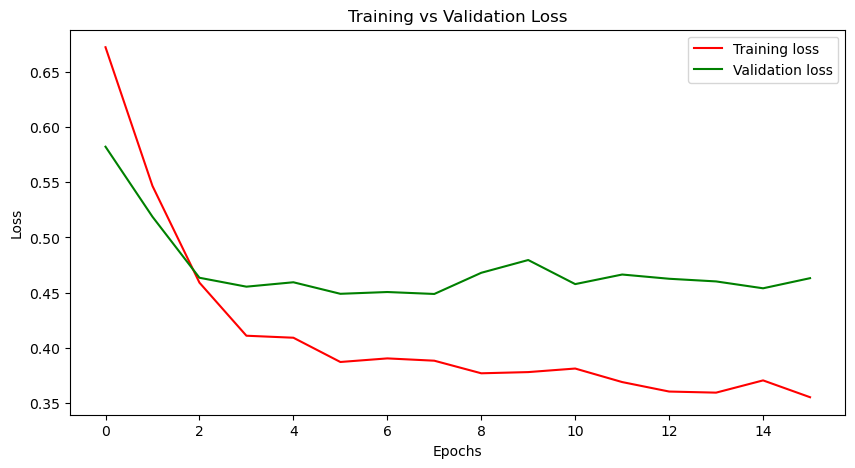

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(breast_cancer_history_df.loc[:, ['loss']], color= 'red', label= 'Training loss')
plt.plot(breast_cancer_history_df.loc[:, ['val_loss']], color= 'green', label= 'Validation loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
## save the model
breast_cancer_model.save('Breast_Cancer_Modelv1')

INFO:tensorflow:Assets written to: Breast_Cancer_Modelv1/assets


In [ ]:
## load the model
breast_cancer_model= tf.keras.models.load_model('Breast_Cancer_Modelv1')

In [ ]:
## create a prediction
Y_pred_ANN= breast_cancer_model.predict(X_test)
Y_pred_ANN

32/32 [==============================] - 0s 338us/step


array([[0.39820585],
       [0.3718125 ],
       [0.5766814 ],
       ...,
       [0.9818639 ],
       [0.3290855 ],
       [0.01878492]], dtype=float32)

In [ ]:
Y_pred_ANN= np.where(Y_pred_ANN>0.5, 1, 0)

In [ ]:
print(classification_report(Y_test, Y_pred_ANN))

              precision    recall  f1-score   support

           0       0.77      0.85      0.80       597
           1       0.74      0.63      0.68       421

    accuracy                           0.76      1018
   macro avg       0.76      0.74      0.74      1018
weighted avg       0.76      0.76      0.75      1018



In [ ]:
## calculate the confusion matrix
breast_cancer_model_matrix= confusion_matrix(Y_test, Y_pred_ANN)
breast_cancer_model_matrix

array([[505,  92],
       [154, 267]])

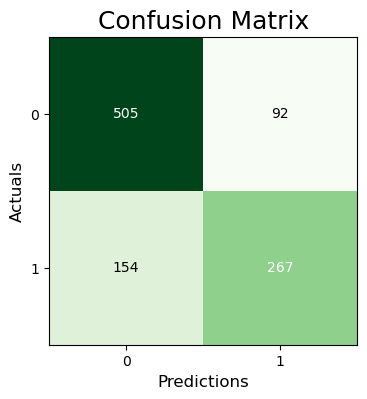

In [ ]:
## plot the confusion matrix plot to see this clearly

fig, ax = plot_confusion_matrix(conf_mat=breast_cancer_model_matrix, figsize=(4,4), cmap="Greens")
plt.xlabel('Predictions', fontsize = 12)
plt.ylabel('Actuals', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 18)
plt.show()

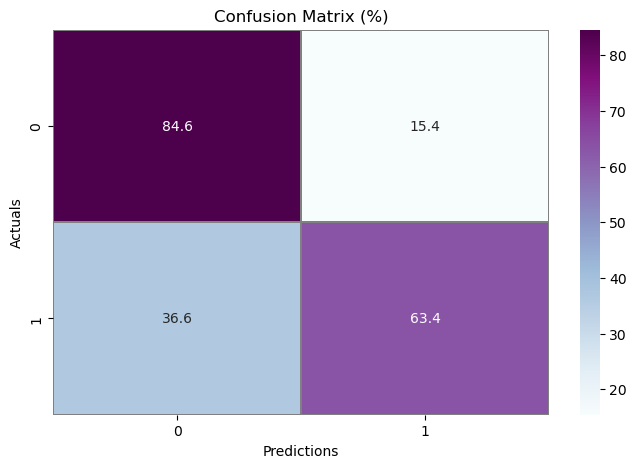

In [ ]:
breast_cancer_model_matrixperct= breast_cancer_model_matrix.astype('float')/breast_cancer_model_matrix.sum(axis=1)[:, np.newaxis]* 100

f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(breast_cancer_model_matrixperct, annot=True, linewidths=0.01, cmap="BuPu", linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix (%)')
plt.show()

My true negative = looks very good for predicting 505 correctly out of 597  = 84.6% correct prediction

My false positive - Type 1 error = is predicting falsely for 92 to have cancer, but in fact they are all healthy = 15.4% incorrect prediction

My true positive = looks correct for predicting 267 to have cancer correctly out of 421 = 63.4% correct prediction

My false negative - Type 2 error = is predicting falsely for 154 who actually have cancer as healthy = 36.6% incorrect prediction

AUC: 0.740050


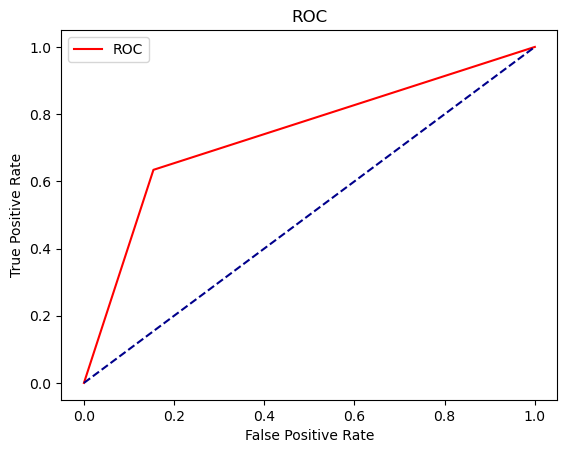

In [ ]:
## plot the Area Under the Curver(AUC)
auc_mod_ANN= roc_auc_score(Y_test, Y_pred_ANN)
print('AUC: %f' %auc_mod_ANN)

## grab only 2 values, ignores thresholds

fpr, tpr = roc_curve(Y_test, Y_pred_ANN)[0:2]
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

In [ ]:
## apply Gaussian Naive Bayes model

from sklearn.naive_bayes import GaussianNB

NB_cancer= GaussianNB()
NB_model= NB_cancer.fit(X_train, Y_train)
NB_model

GaussianNB()

In [ ]:
Y_pred_NB= NB_model.predict(X_test)
Y_pred_NB

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
print(classification_report(Y_test, Y_pred_NB))

              precision    recall  f1-score   support

           0       0.82      0.54      0.65       597
           1       0.56      0.83      0.67       421

    accuracy                           0.66      1018
   macro avg       0.69      0.69      0.66      1018
weighted avg       0.71      0.66      0.66      1018



In [ ]:
## prepare confusion matrix

conf_matrix_NB= confusion_matrix(Y_test, Y_pred_NB)
conf_matrix_NB

array([[324, 273],
       [ 71, 350]])

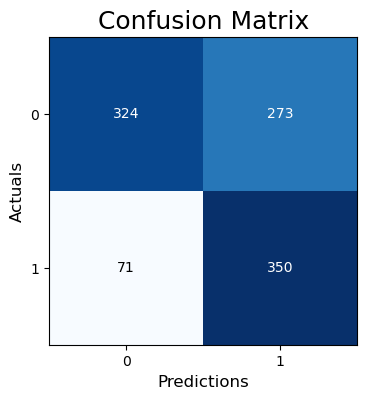

In [ ]:
## plot the confusion matrix 

from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=conf_matrix_NB, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 12)
plt.ylabel('Actuals', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 18)
plt.show()

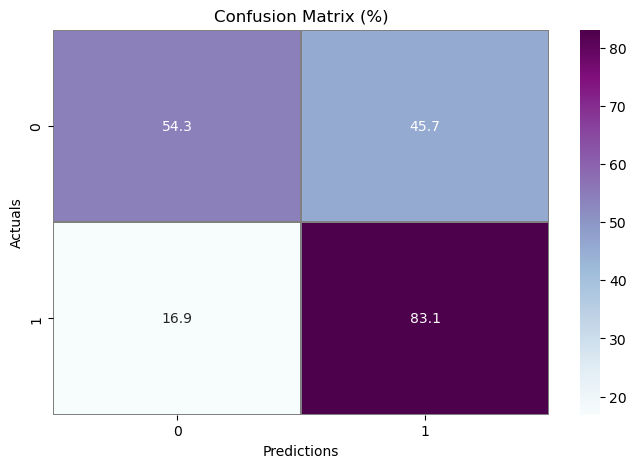

In [ ]:
conf_matrix_NBperct= conf_matrix_NB.astype('float')/conf_matrix_NB.sum(axis=1)[:, np.newaxis]* 100

f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(conf_matrix_NBperct, annot=True, linewidths=0.01, cmap="BuPu", linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix (%)')
plt.show()

My true negative = doesn't look very good for predicting only 324 correctly out of 597  = 54.3% correct prediction

My false positive - Type 1 error = is predicting falsely for 273 to have cancer, but in fact they are all healthy = 45.7% incorrect prediction

My true positive = looks correct for predicting 350 to have cancer correctly out of 421 = 83.1% correct prediction

My false negative - Type 2 error = is predicting falsely for 71 who actually have cancer as healthy = 16.9% incorrect prediction

AUC: 0.687034


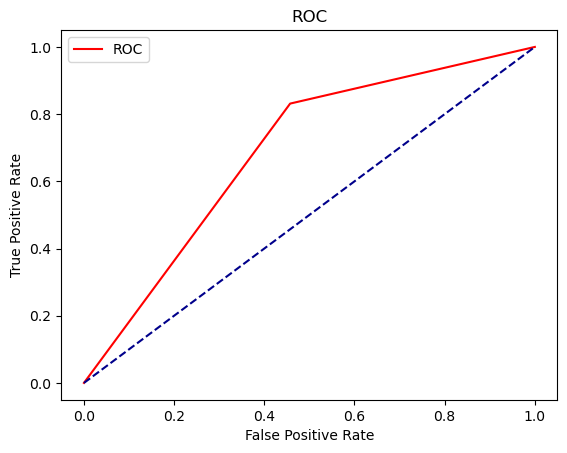

In [ ]:
## plot the Area Under the Curver(AUC)
auc_mod_NB= roc_auc_score(Y_test, Y_pred_NB)
print('AUC: %f' %auc_mod_NB)

## grab only 2 values, ignores thresholds

fpr, tpr = roc_curve(Y_test, Y_pred_NB)[0:2]
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

In [ ]:
## set an SVM model to test again

model_SVM= svm.SVC()
model_SVM.fit(X_train, Y_train)


SVC()

In [ ]:
## make a prediction
Y_pred_SVM= model_SVM.predict(X_test)

In [ ]:
## create a dataframe for prediction
cancer_prediction_SVM = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_SVM})
cancer_prediction_SVM.head()

,Actual,Predicted
1205,1,0
3045,0,1
2191,1,0
324,0,0
735,1,1


In [ ]:
## check accuracy
accuracy_SVM= accuracy_score(Y_test, Y_pred_SVM)
accuracy_SVM

0.7770137524557956

In [ ]:
## check confusion matrix
conf_mat_SVM = confusion_matrix(Y_test, Y_pred_SVM)
conf_mat_SVM

array([[533,  64],
       [163, 258]])

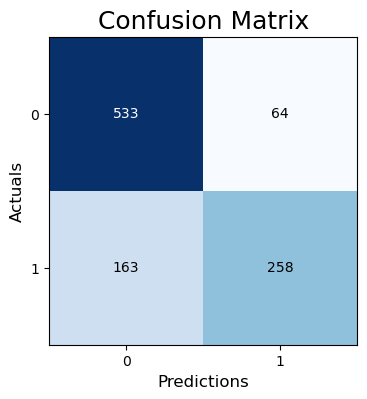

In [ ]:
## plot the confusion matrix 

from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=conf_mat_SVM, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 12)
plt.ylabel('Actuals', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 18)
plt.show()

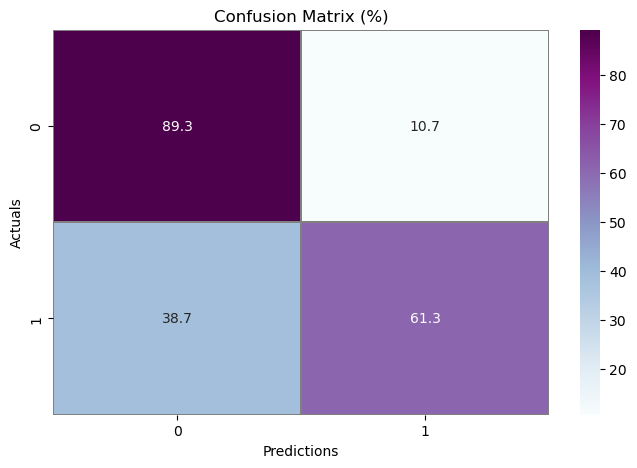

In [ ]:
conf_mat_SVMperct= conf_mat_SVM.astype('float')/conf_mat_SVM.sum(axis=1)[:, np.newaxis]* 100

f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(conf_mat_SVMperct, annot=True, linewidths=0.01, cmap="BuPu", linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix (%)')
plt.show()

In [ ]:
## print the classification report
print(classification_report(Y_test, Y_pred_SVM))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       597
           1       0.80      0.61      0.69       421

    accuracy                           0.78      1018
   macro avg       0.78      0.75      0.76      1018
weighted avg       0.78      0.78      0.77      1018



AUC: 0.752812


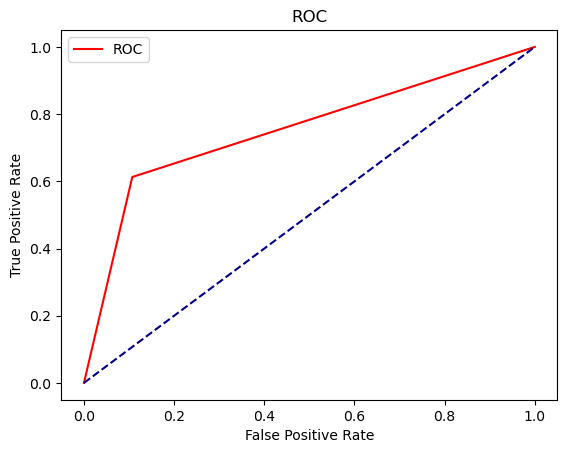

In [ ]:
## plot the Area Under the Curver(AUC)
auc_mod_SVM= roc_auc_score(Y_test, Y_pred_SVM)
print('AUC: %f' %auc_mod_SVM)

## grab only 2 values, ignores thresholds

fpr, tpr = roc_curve(Y_test, Y_pred_SVM)[0:2]
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

In [ ]:
## what happens if use kernel function for SVM?
## I will test all three kernel functions to compare and also to practice

linear_cancer_SVM= svm.SVC(kernel='linear')
sigmoid_cancer_SVM= svm.SVC(kernel='sigmoid')
rbf_cancer_SVM= svm.SVC(kernel='rbf')

In [ ]:
## train my models 
linear_cancer_SVM.fit(X_train, Y_train)
sigmoid_cancer_SVM.fit(X_train, Y_train)
rbf_cancer_SVM.fit(X_train, Y_train)

SVC()

In [ ]:
## make predictions for each
Y_pred_linear_SVM= linear_cancer_SVM.predict(X_test)
Y_pred_sigmoid_SVM= sigmoid_cancer_SVM.predict(X_test)
Y_pred_rbf_SVM= rbf_cancer_SVM.predict(X_test)

In [ ]:
## check each model's accuracy
print('Accuracy(linear):', metrics.accuracy_score(Y_test, Y_pred_linear_SVM))
print('Accuracy(sigmoid):', metrics.accuracy_score(Y_test, Y_pred_sigmoid_SVM))
print('Accuracy(rbf):', metrics.accuracy_score(Y_test, Y_pred_rbf_SVM))


Accuracy(linear): 0.7367387033398821
Accuracy(sigmoid): 0.6601178781925344
Accuracy(rbf): 0.7770137524557956


In [ ]:
## so using a kernel with SVM doesn't give us  a better accuracy for our model, so no need to proceed.
